# 2.2 Кластеризация. Баннеры.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

## Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет используя pandas `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift

In [2]:
df = pd.read_csv("../../data/checkins.csv.gz",compression='gzip')

In [3]:
df.shape

(100000, 2)

In [4]:
df.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [5]:
df.describe()

,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [6]:
ms = MeanShift(bandwidth=0.1,n_jobs=None)

In [7]:
%%time
ms.fit(df)

Wall time: 2min 55s


MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

??? При n_jobs > 1, значительно увеличивается Wall time. Т.е. нагрузка на цп уже спала, но результат рассчетов еще не выдается, в отличии от 1 потока. Почему так?

CPU times: user 2.52 s, sys: 742 ms, total: 3.26 s
Wall time: 36.9 s

In [8]:
cluster_centers = ms.cluster_centers_
labels = ms.labels_

In [9]:
print('clusters: {}'.format(len(cluster_centers)))

clusters: 3231


### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Добавлю координаты офисов в массив
offices = np.array([[33.751277, -118.188740],
           [25.867736, -80.324116], 
           [51.503016, -0.075479],
           [52.378894, 4.885084],
           [39.366487, 117.036146],
           [-33.868457, 151.20513]])

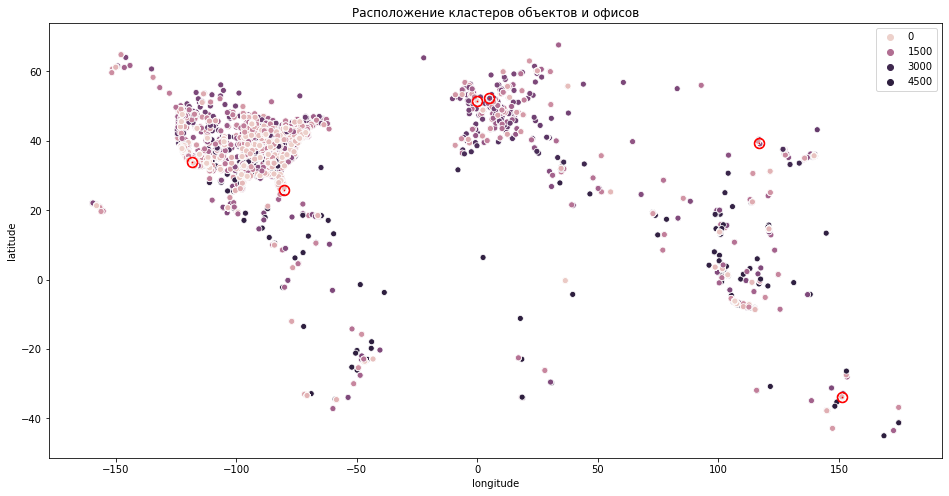

In [12]:
plt.figure(figsize=(16,8)) 
plt.scatter(x=offices[:,1],y=offices[:,0], marker = ".",color = 'r', s = 10, linewidths = 10, zorder = 10)
sns.scatterplot(data = df, x='longitude', y='latitude', hue=labels)

#Добавить центры кластеров
#plt.scatter(cluster_centers[:,1],cluster_centers[:,0],marker = ".",color = 'g', s = 10, linewidths = 2, zorder = 10)
plt.title('Расположение кластеров объектов и офисов')
plt.show()

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

Инфо [itertools](https://all-python.ru/osnovy/itertools.html)

In [13]:
#! Разобраться с itertools.groupby

In [14]:
from itertools import groupby

2 вариант:

In [15]:
df['cluster'] = labels

In [16]:
df_gt15 = df.groupby('cluster').filter(lambda x: len(x)>15)

In [17]:
df_gt15.groupby('cluster')['cluster'].unique().count()

592

In [18]:
df_gt15.shape

(90862, 3)

In [19]:
df.shape

(100000, 3)

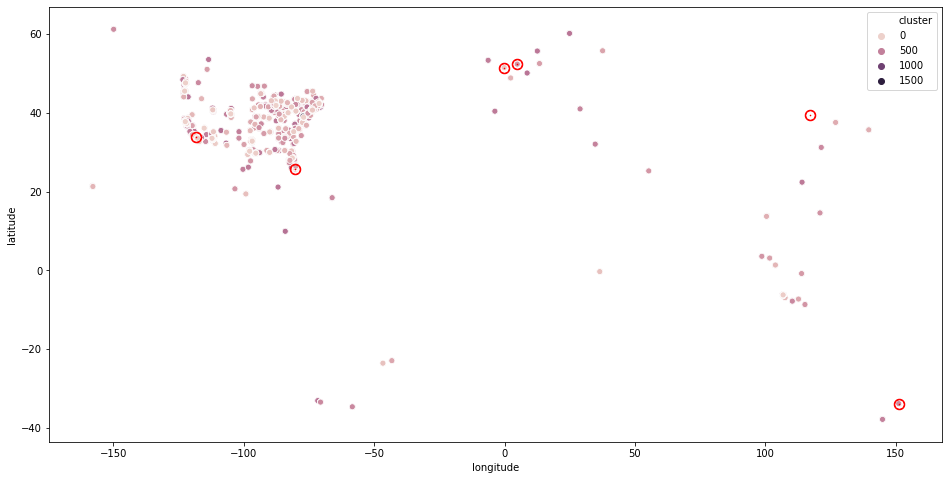

In [32]:
plt.figure(figsize=(16,8)) 
#Добавить офисы
plt.scatter(x=offices[:,1],y=offices[:,0], marker = ".",color = 'r', s = 10, linewidths = 10, zorder = 10)
#Добавить точки
sns.scatterplot(data = df_gt15, y='latitude',x='longitude', hue='cluster')

#Добавить центры кластеров
#for l in df_gt15['cluster'].unique():
#    plt.scatter(cluster_centers[l-1:l,1],cluster_centers[l-1:l,0],marker = ".",color = 'g', s = 10, linewidths = 1, zorder = 10)
plt.show()

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

Сделаю датафрейм с уникальными кластерами в которых более 15 объектов, добавлю координаты кластеров

In [21]:
df_gt15_с = pd.DataFrame(df_gt15['cluster'].unique(),columns=['cluster'])

Добавлю еще количество объектов в кластере, чтобы смотреть наиболее привлекательные кластеры из тех, которые имеют одинаковое расстояние до офиса

In [22]:
df_count_in_clus = df.groupby('cluster')['latitude'].count().rename('count').reset_index()

In [23]:
def GetCountInCluster(cluster,df):
    return int(df[df['cluster']==cluster]['count'])   

In [24]:
df_gt15_с['count_in_cluster'] = df_gt15_с['cluster'].apply(lambda c: GetCountInCluster(c,df_count_in_clus))

Так же добавлю координаты центров кластеров

In [25]:
df_gt15_с['cc_latitude'] = df_gt15_с['cluster'].apply(lambda c: cluster_centers[c][0])

In [26]:
df_gt15_с['cc_longitude'] = df_gt15_с['cluster'].apply(lambda c: cluster_centers[c][1])

In [81]:
#Считаю евклидово расстояние от офисов до всех координат и записываю в df_15 в новые столцы
from scipy.spatial import distance

offices_name = ['Los Angeles','Miami','London','Amsterdam','Beijing','Sydney']
for i in range(6):                                                        
    #Расстояние от офиса до центора кластера
    df_gt15_с['cc_to_{}'.format(offices_name[i])] = [distance.euclidean(offices[i],cc) \
                                                     for cc in np.array(df_gt15_с[['cc_latitude','cc_longitude']])]

Если взглянуть на карту расположения центров кластеров и офисов, то видно, что например у Лос-Анджелеса большая концентрация, а у Сиднея низкая. Т.о. 20 кластеров лучше выбирать исходя из расстояния и концентрации, а так же количество элементов в кластерах.

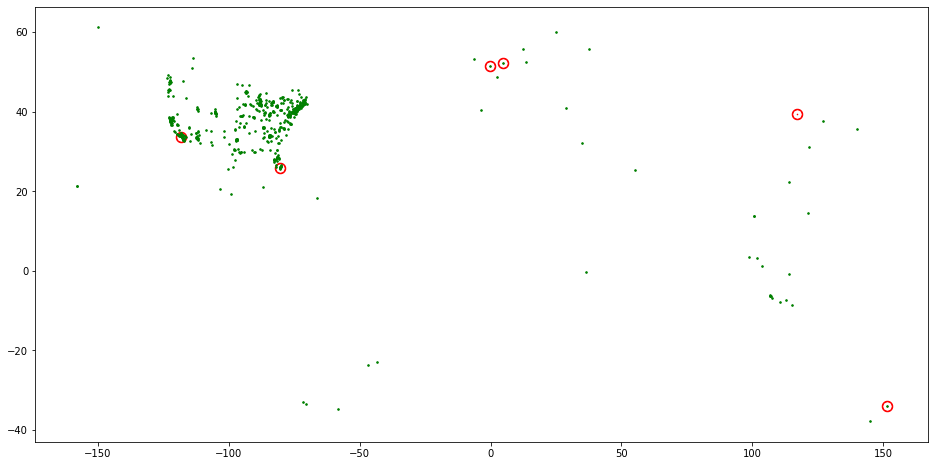

In [83]:
plt.figure(figsize=(16,8)) 
#Добавить офисы
plt.scatter(x=offices[:,1],y=offices[:,0], marker = ".",color = 'r', s = 10, linewidths = 10, zorder = 10)
#Добавить центры кластеров
for l in df_gt15_с['cluster']:
    plt.scatter(cluster_centers[l-1:l,1],cluster_centers[l-1:l,0],marker = ".",color = 'g', s = 10, linewidths = 1, zorder = 10)
plt.show()

Т.к. требования к размещению баннеров 1.близко к офису и 2.популярность туристов (по сути количество элементов в кластере), то у Сиднея всего 2 кластера подходят под эти требования, т.к. остальные на других континентах.

In [113]:
df_gt15_с.sort_values(by=['cc_to_Sydney']).head()[['cluster','count_in_cluster','cc_to_Sydney']]

,cluster,count_in_cluster,cc_to_Sydney
139,420,28,0.007835
570,483,23,7.378790
588,359,31,43.940861
517,252,49,46.765767
505,447,27,48.454710


У Пекина ситуация "не лучше", например у Лондона больше кластеров расположенных ближе.

In [114]:
df_gt15_с.sort_values(by=['cc_to_Beijing']).head()[['cluster','count_in_cluster','cc_to_Beijing']]

,cluster,count_in_cluster,cc_to_Beijing
581,432,27,9.267575
125,223,55,10.103449
576,538,19,17.220574
122,213,58,22.967694
421,383,31,25.089676


In [115]:
df_gt15_с.sort_values(by=['cc_to_London']).head(10)[['cluster','count_in_cluster','cc_to_London']]

,cluster,count_in_cluster,cc_to_London
118,58,254,0.050058
159,188,66,3.586075
270,370,31,5.043393
66,522,19,6.461314
589,573,16,8.865865
565,546,18,11.663336
567,557,17,13.338560
534,306,39,13.525424
372,572,16,26.472182
253,474,23,30.890887


In [118]:
df_gt15_с.sort_values(by=['cc_to_Amsterdam']).head(10)[['cluster','count_in_cluster','cc_to_Amsterdam']]

,cluster,count_in_cluster,cc_to_Amsterdam
270,370,31,0.009353
159,188,66,4.341235
589,573,16,4.421114
118,58,254,5.086603
567,557,17,8.384942
534,306,39,8.527540
66,522,19,11.195965
565,546,18,14.723971
372,572,16,21.513001
253,474,23,26.641656


А вот у Лос-Анджелеса и Майами наблюдается максимальная концентрация кластеров:

In [120]:
df_gt15_с.sort_values(by=['cc_to_Los Angeles']).head(20)[['cluster','count_in_cluster','cc_to_Los Angeles']]

,cluster,count_in_cluster,cc_to_Los Angeles
18,51,281,0.070848
184,87,100,0.195779
93,42,384,0.211811
124,291,37,0.222233
278,119,74,0.294979
106,27,577,0.304731
11,11,1081,0.314884
15,32,449,0.338810
52,17,645,0.378688
16,47,273,0.386706


In [121]:
df_gt15_с.sort_values(by=['cc_to_Miami']).head(20)[['cluster','cc_to_Miami']]

,cluster,cc_to_Miami
355,419,0.022674
165,29,0.134109
140,167,0.167406
112,92,0.188876
248,320,0.271301
135,55,0.302270
134,159,0.340846
131,144,0.540471
515,293,0.671049
413,257,0.883592


Очевидно, что для Сиднея и Пекина подходит не более 2х кластеров для размещения баннеров, у Лондона и Амстердама +/- по 5

In [141]:
df_banners = pd.DataFrame().append(df_gt15_с.sort_values(by=['cc_to_Sydney']).iloc[:2])

In [142]:
df_banners = df_banners.append(df_gt15_с.sort_values(by=['cc_to_Beijing']).iloc[:2])

Лондон и Амстердам находят близко друг к другу и меют общие кластеры подходящие для размещения баннеров.
Возьмем суммарно не более 10 кластеров наиболее близких и имеющих наибольшую концентрацию элементов.

In [156]:
df_banners = df_banners.append(\
        df_gt15_с[(df_gt15_с['cc_to_London']<20)|(df_gt15_с['cc_to_Amsterdam']<20)]\
                               .sort_values(by=['count_in_cluster'],ascending=False).head(10)
                              )

In [158]:
df_banners.shape

(12, 10)

Осталось разместить 8 баннеров у Лос-Анджелеса и Майами. Т.к. там очень много кластеров возле офисов, ограничим минимальное расстояние еще меньше.

In [163]:
df_banners = df_banners.append(\
        df_gt15_с[(df_gt15_с['cc_to_Los Angeles']<2)|(df_gt15_с['cc_to_Miami']<2)]\
                               .sort_values(by=['count_in_cluster'],ascending=False).head(8)
                              )

In [165]:
df_banners

,cluster,count_in_cluster,cc_latitude,cc_longitude,cc_to_Los Angeles,cc_to_Miami,cc_to_London,cc_to_Amsterdam,cc_to_Beijing,cc_to_Sydney
139,420,28,-33.860630,151.204776,277.748513,239.108983,173.702814,169.843186,80.806596,0.007835
570,483,23,-37.809054,144.966681,272.711673,234.116802,170.334595,166.603481,82.074228,7.378790
581,432,27,31.230393,121.473704,239.675702,201.869062,123.228175,118.491204,9.267575,71.566878
125,223,55,37.566535,126.977969,245.196394,207.631925,127.815508,122.988124,10.103449,75.431515
118,58,254,51.502991,-0.125537,119.390298,84.196071,0.050058,5.086603,117.788602,173.750554
159,188,66,48.857766,2.345798,121.477491,85.807087,3.586075,4.341235,115.082406,170.301875
534,306,39,52.523405,13.411400,132.932275,97.451894,13.525424,8.527540,104.456654,162.636607
270,370,31,52.372964,4.892317,124.481781,89.243306,5.043393,0.009353,112.895557,169.838223
66,522,19,53.342887,-6.269303,113.621264,78.987336,6.461314,11.195965,124.095018,180.011154
565,546,18,40.417455,-3.700910,114.681738,77.992371,11.663336,14.723971,120.741630,171.797200


Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)` если считаете через geopy, либо `(-33.86063043, 151.20477593)` если считаете с евклидовой метрикой. Если у вас не так, то считайте, что вы сделали что-то неправильно. 